#PREDICTIVE MODELING — D208
## TASK 1: MULTIPLE REGRESSION FOR PREDICTIVE MODELING







## **Part I: Research Question**

**A1: RESEARCH QUESTION:**

Are there correlations among the selected predictor variables and the target variable, tenure?



**A2: OBJECTIVES AND GOALS:**

The objective of predictive modeling is to implement a statistical technique using historical data to create, process, and validate a model to predict future results (Frankenfield, 2021).

The model uses predictor variables in the dataset to determine impactful variables and interprets results to gain insights that a company can use to improve its services and establish proven marketing strategies to target customers likely to change services due to many factors. The goals are to prevent customers from abandoning the business and acquire more customers based on the correlated variables. For example, suppose we established that higher-income customers tend to stay with the company longer. In that case, the company will then focus on that demographic of customers from not leaving the business because the cost of acquiring new customers outweighs the cost of retaining the existing customers.

The main goal of building the predictive model is to help the company retain the customers with longer tenure by trying to find what features of services highly correlate with tenure and constantly improve those features to make the customers continue business with the company. Another goal is to capture the market share by using data-driven techniques.

## **Part II: Method Justification**

B. Describe multiple regression methods by doing the following:

**B1: SUMMARY OF ASSUMPTIONS:**

Summarize the assumptions of a multiple regression model.

The regression model makes assumptions about the relationships among the dependent and independent variables as linear. A single linear regression model analyzes the relationship between one predictor variable and the target variable. With a multiple regression model, more than one predictor variable and a target variable are analyzed to find if there are any linear relationships among them. The regression model makes it possible to explore what happens to the target variable when there are changes in the predictor variables (Ott et al., 2016). Other assumptions are that all the variables follow normal distributions, there's no multicollinearity, and data is homoscedastic i.e it's constant(Pardoe, 2021).The multiple regression model is an extension of single linear regression and is expressed as:

  **<center>y = α + β$_{1}$x$_{1}$ + β$_{2}$x$_{2}$ + ...+ β$_{i}$x$_{i}$ + ε</center>**

Where y = target variable, intercept=α , regression coefficients=β$_{i}$,  x$_{i}$ = predictor variables, and ε = error term

**B2: TOOL BENEFITS:**

Python is one of the best tools used in the field of data science. Its large scientific-based libraries make it easy to use when performing data analyses. Python is universally liked for its user-and- beginner-friendliness when learning how to program. It is also open-source, meaning no software to purchase when starting (2022). Regarding data science, its vast libraries such as numpy, pandas, and matplotlib enable data analysts and data scientists to acquire insights from the treasure trove of data buried in the data warehouses of many companies (Rane, 2021). For example, using pandas data can be imported from files csv,Excel,and others. On the other hand, matplotlib can utilized for visizualtion aspect during the exploratory data analysis steps where graphs are plotted to see how data points are distributed. For example, for multiple linear regression, the univariate and bivariate graphs can be plotted using the matplotlib library.

**B3: APPROPRIATE TECHNIQUE:**

Since the predictor variables are more than one, it is the most appropriate technique to be employed to answer the research question. The goal of the question is to find out what variations are observed in the target variable when combining all the predictor variables. Another reason why a multiple regression technique is appropriate is that most of the real-world data analyses involve more than one independent variable and the likelihood of using this technique is high especially for numeric predictions (Lantz, 2019).








In [ ]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set_theme(style="darkgrid")
import warnings
import pandas.util.testing as tm
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Loading the dataset
cleaned_churn = pd.read_csv('/content/drive/MyDrive/Telecom Churn Data/churn_clean.csv')
cleaned_churn.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [ ]:
# Check the names of the variables
cleaned_churn.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

### Checking for Missing Values

In [ ]:
# Find for missing values
cleaned_churn.isna().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [ ]:
# Count the number of rows and columns in the dataset
cleaned_churn.shape

(10000, 50)

## Dropping Irrelevant Columns
Some columns in the dataset provide no useful insights when it comes to building the linear regression model so it's necessary to discard them to reduce the size of the dataset and make it easy to create a better and robust model.

The following columns will be therefore dropped.

In [ ]:
# Drop the irrelevant variables
cleaned_churn = cleaned_churn.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job','Marital','PaymentMethod'])

### Outliers Detection
Checking for the outliers in the numerical variables.

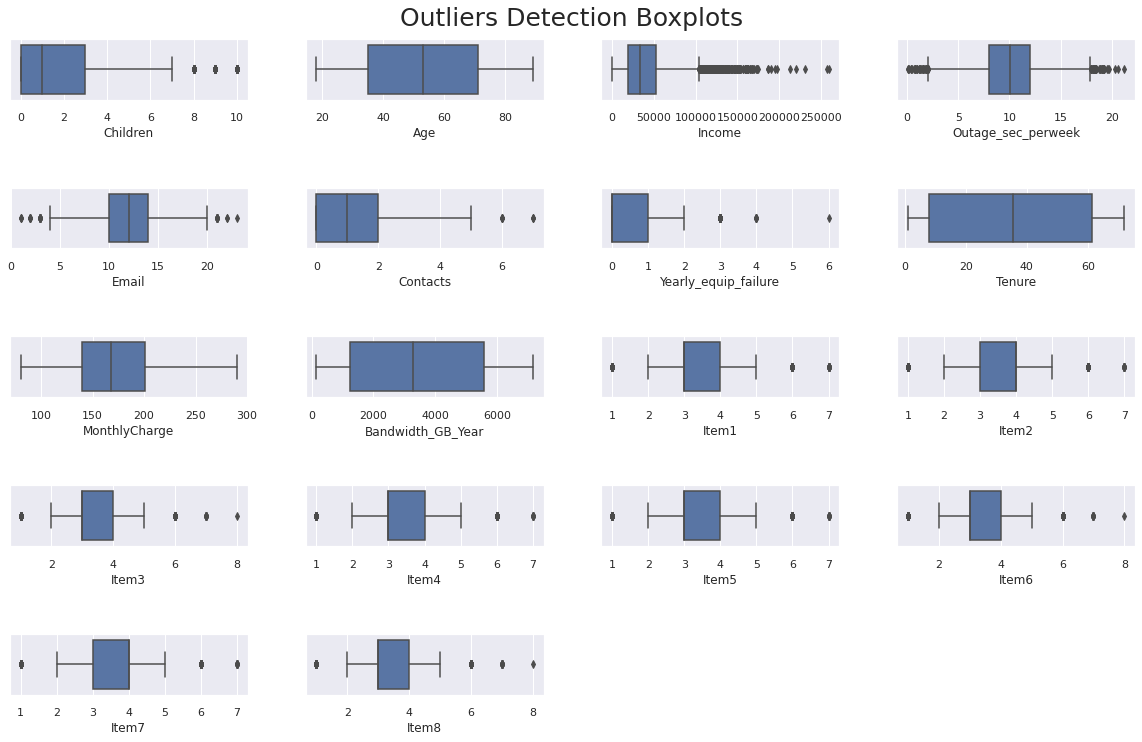

In [ ]:
# Function to detect the outliers
def find_outliers(df):
  num_cols =  df.select_dtypes(include = np.number)
  plt.figure(figsize=(17,11))
  plt.xticks()

  for i,col in enumerate(num_cols,1):
    plt.subplot(5,4,i)
    sns.boxplot(df[col])
    # plt.ylabel(col)
    plt.suptitle(' Outliers Detection Boxplots ', fontsize=25)
    plt.tight_layout(pad=4)

  plt.show()

find_outliers(cleaned_churn)

There are  17 variables with outliers. Since outliers distort the  facts about statistical findings, several ways are available to deal them. In this project I will keep the outliers as the dataset is small and customers actual number could be greater than  one in the dataset and therefore it's better to avoid sampling bias by not removing customers that appear as outliers but they are the actual customers with varying economic backgrounds. For example, some customers are wealthy and therefore their lifestyles are different from the majority of the customers.

In [ ]:
# Selecting only the numerical variables
cleaned_churn.select_dtypes(include = np.number).columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [ ]:
# Checking again the number of rows and columns after removing the unnecessary columns
cleaned_churn.shape

(10000, 34)

## **Part III: Data Preparation**

**C1: DATA GOALS:**

C. Summarize the data preparation process for multiple regression analysis by doing the following:

Describe your data preparation goals and the data manipulations that will be used to achieve the goals.

The first step I need to take for the data preparation part is to get the data itself; but in my case the Churn dataset is already cleaned and ready for the next step in the lifecycle of the data analysis. Following the data acquisition, I will import Python's data science libraries to my jupyter notebook and then load the dataset using Pandas's csv method. The next step is going to be the data exploration phase where I will be using the tools imported to manipulate the dataset. For example, I will check the size ,shape, distributions, and missing values of my dataset. To manipulate the data, I will use both graphical and tabular techniques to discover patterns in the data. For example, using matplotlib I can create a histogram of each variable to find  data distributions. In using a tabular method, I will use stastical summaries to explore the central tendencies of the data for each variable.

Since the goal of this project is to determine the linear relationship between the target and predictor variables, knowing the data distributions makes the decision of choosing  appropriate variables less complicated. By manipulating data through visualization and tabular methods, the relationships among the variables can be understood based on the research question and selected accordingly.

Another step is to for check the data types available in the dataset . These include string, numeric, object, and NaN. This is an important step because the multiple linear regression model only deals with numerical data types.
By taking into account how many of each data type is in the dataset, appropriate data conversion methods can be used to change non-numerical data types to numerical data types.

**C2: SUMMARY STATISTICS:**

To come up with summary statistics, I will use two approaches;
- a tabular summary statistics
-and detailed discussions about the statistics shown in the table.


The summary statistics for the variables are shown below.

In [ ]:
# Displaying the statistical summaries of the numerical variables
cleaned_churn.describe()


,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


## Correlations among the variables

In [ ]:
# Checking the correlations among the variables
cleaned_churn.corr()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
Children,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.005091,-0.009781,0.025585,0.011470,0.013146,0.003394,-0.016768,-0.000240,-0.000547,0.000687,-0.005236
Age,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.016979,0.010729,-0.014724,-0.005972,0.006659,-0.003778,0.012237,-0.008305,0.010635,0.005353,0.015193
Income,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,0.002114,-0.003014,0.003674,-0.004009,0.007718,-0.002707,-0.022750,0.011111,0.001768,0.016599,0.000740
Outage_sec_perweek,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.002932,0.020496,0.004176,-0.023338,-0.008076,-0.021366,-0.005992,-0.004156,-0.014752,-0.020854,0.008126
Email,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,-0.014468,0.001997,-0.014579,0.003709,0.001156,0.012928,0.000915,-0.007929,0.014468,0.010010,-0.005857
Contacts,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032,0.002820,0.004259,0.003299,-0.007364,-0.003003,-0.021924,0.001071,0.004698,-0.000994,0.004579,-0.012615
Yearly_equip_failure,0.007321,0.008577,0.005423,0.002909,-0.016354,-0.006032,1.000000,0.012435,-0.007172,0.012034,0.007518,-0.009773,-0.009372,-0.006906,0.003416,-0.003995,-0.010368,-0.009859
Tenure,-0.005091,0.016979,0.002114,0.002932,-0.014468,0.002820,0.012435,1.000000,-0.003337,0.991495,-0.006246,0.003073,0.002351,-0.006714,0.024618,-0.010127,0.000410,-0.016347
MonthlyCharge,-0.009781,0.010729,-0.003014,0.020496,0.001997,0.004259,-0.007172,-0.003337,1.000000,0.060406,0.009756,0.003442,-0.008487,-0.000440,-0.005562,0.002943,-0.006399,0.002204
Bandwidth_GB_Year,0.025585,-0.014724,0.003674,0.004176,-0.014579,0.003299,0.012034,0.991495,0.060406,1.000000,-0.007314,0.003062,0.000978,-0.007789,0.025112,-0.010352,-0.001077,-0.015018


### Discusion About Summary Statistics

The statistical summary of the dataset of the all the predictor variables indicates that on average a customer's household contains 2 children with a mean
income of \$39,806.93 and standard deviations of 2.15 and \$28,199.92, respectively.The average age of a customer with the company is  53.1 with standard deviation of 20.7. On the other hand, when it comes to problems with the service, a customer experienced 10 outages per week on average with standard deviation of 2.98 and a mean of 0.4 of yearly equipment failure with standard deviation of 0.64. An average of 12.02 of emails were sent by the customer with the standard deviation of 3.03. A customer is charged a monthly fee of \$172.6 on average with standard deviation of \$42.94. When it comes to data useage, a mean of 3392.3 GB of data is used per year by a customer with a standard deviation of 2185.3 GB. Item1 through Item8 have roughly the same average of 3.49 and standard deviation of 1.02. Finally, a customer tends to be with the company for 34.5 years on average as indicated by the 'tenure' variable.

When establishing correlations among the variables, there is no indication that, for example, having a lot of children means high data usage as the correlation between the number of children and bandwidth of GB used a year is very weak (0.026). It's the same story across all other variables with the exception of the bandwidth of GB versus the customer’s tenure. These variables show a very strong correlation (0.99).


**C3: STEPS TO PREPARE THE DATA:**

Explain the steps used to prepare the data for the analysis, including the annotated code.

- Import the necessary libraries from Python
-	Load the dataset
- Perform exploratory data analyses on the dataset
- Looking for the missing values
- Convert the categorical variables into numerical variables by using Pandas's dummy variables' method
-	Visualize the variables to check for data distributions and correlations
- Use statistical methods to remove some variables for better prediction
- Build the regression model in original and reduced states
- Test the models
_ Explain the models' predicted results through visualizations and discussions
- Evaluate and provide recommendations based on the final model's results

## Creating Dummy Variables
Using the code below, the categorical variables in the dataset will be converted into the numerical variables because it's difficult to establish relationships among the variables if they are not all numerical. The method that will be used is the pandas's get_dummies() method. This method converts the values in the categorical variables to either 1 or 0. In linear regression, it's important to avoid multicollinearity that gets introduced when using the dummy variables and therefore any values of the variables that go beyond 1 will be discarded as shown by this formula: k-1 where k represents levels present in the categorical variable. For example in the Gender column, the levels are represent as 'Male' or 'Female'. So k is 2 and therefore the dummy variable is going to be 2 - 1 and that means we only need one variable to be included to linear regression equation.

In the following steps below, code will be generated to create the intended dummy variables.

In [ ]:
# Find all categorical variables and then convert to a list
cat_columns = cleaned_churn.select_dtypes(['object']).columns
cat_columns =  list(cat_columns)
cat_columns


['Gender',
 'Churn',
 'Techie',
 'Contract',
 'Port_modem',
 'Tablet',
 'InternetService',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

In [ ]:
# This function removes redundancies and creates dummy variables while also removing original categorical variables
def dummified(df, cat_columns):
  for x in cat_columns:
    dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False, drop_first=True)
    df = df.drop(x, 1)
    df = pd.concat([df, dummies], axis=1)
  return df
cleaned_churn = dummified(cleaned_churn, cat_columns)
cleaned_churn.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Gender_Male,Gender_Nonbinary,Churn_Yes,Techie_Yes,Contract_One year,Contract_Two Year,Port_modem_Yes,Tablet_Yes,InternetService_Fiber Optic,InternetService_None,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,1,0,0,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,1
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0,0,1,1,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,1,1
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0


In [ ]:
cleaned_churn.shape

(10000, 37)

####Moving The Target to End of Columns
Another major step is to move the target variable, tenure, to the end of the columns. This is the standard used in machine learning so that when building the model it's easy to separate the predictor and target variables.

In [ ]:
# Rearranging the columns so that the target variable is at the end
cleaned_churn.insert(len(cleaned_churn.columns)-1, 'Tenure', cleaned_churn.pop('Tenure'))
cleaned_churn.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Gender_Male,Gender_Nonbinary,Churn_Yes,Techie_Yes,Contract_One year,Contract_Two Year,Port_modem_Yes,Tablet_Yes,InternetService_Fiber Optic,InternetService_None,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,Tenure
0,0,68,28561.99,7.978323,10,0,1,172.455519,904.536110,5,5,5,3,4,4,3,4,1,0,0,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,1,6.795513
1,1,27,21704.77,11.699080,12,0,1,242.632554,800.982766,3,4,3,3,4,3,4,4,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0,0,1,1,1,1.156681
2,4,50,9609.57,10.752800,9,0,1,159.947583,2054.706961,4,4,2,4,4,3,3,3,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,1,1,15.754144
3,1,48,18925.23,14.913540,15,2,0,119.956840,2164.579412,4,4,4,2,5,4,3,3,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,17.087227
4,0,83,40074.19,8.147417,16,2,1,149.948316,271.493436,4,4,4,3,4,4,4,5,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1.670972


**C4: VISUALIZATIONS:**

Performing linear regression requires the variables to be in a numerical format. All the variables were already converted into numerical type. The next step is to visualize the relationships among the variables. The most important visualizations are the graphs that depict the relationships among the predictor variables because highly correlated predictor variables pose big problems in building a reliable predictive model. In the coming steps, both univariate and bivariate graphical methods will be utilized to check for correlations among the variables.



**Univariate Analysis**

The next step is to check for the distributions of data in the variables. The function below will demonstrate how to check for normal distributions using a histogram and a q-q plot.

In [ ]:
# Function to check normal distributions and outliers
def uni_plot(df, columns):
  plt.figure(figsize=(16,4))
  ax = plt.subplot(1,3,1)
  #histogram
  sns.histplot(df[columns], bins=5, kde=True, ax=ax)

  #Q-Q Plot
  plt.subplot(1,3,2)
  stats.probplot(df[columns], dist='norm', plot=plt)
  plt.title('Q-Q Plot')
  plt.ylabel('Variable Quantiles')

  #boxplot
  # plt.subplot(1,3,3)
  # sns.boxplot(y=df[columns])
  # plt.title('Outliers Detection')

  plt.show()


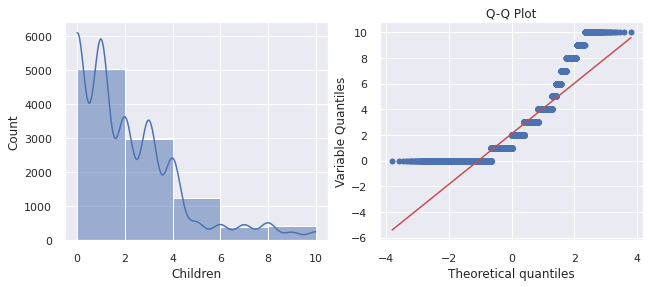

None


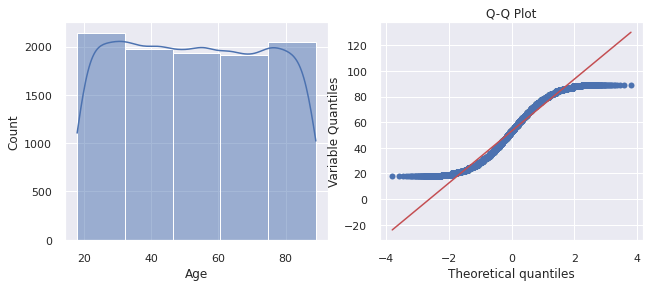

None


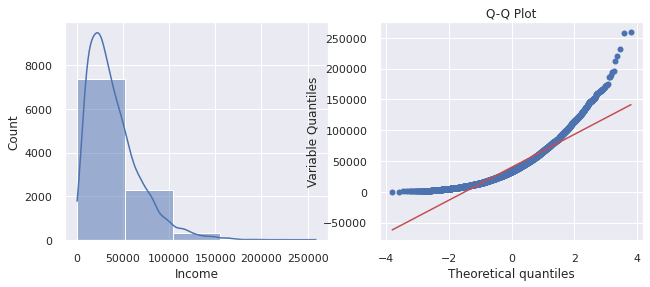

None


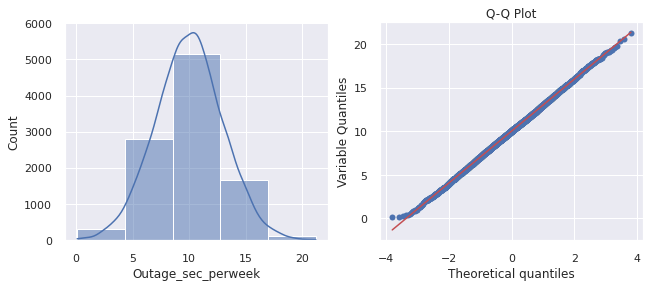

None


In [ ]:
# Univariate Data Distributions
for i in cleaned_churn[['Children', 'Age', 'Income', 'Outage_sec_perweek']]:
  print(uni_plot(cleaned_churn,i))




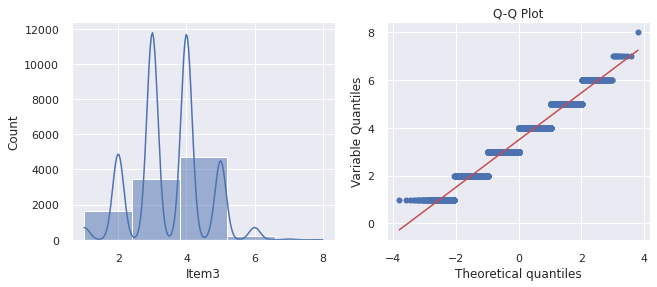

None


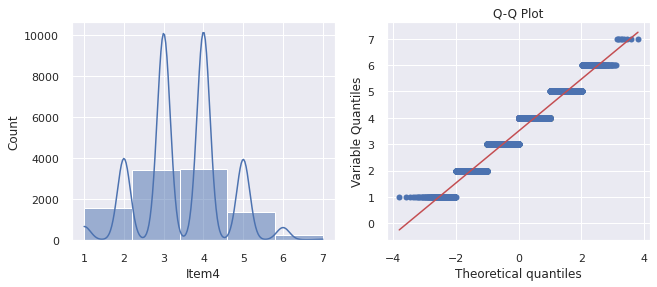

None


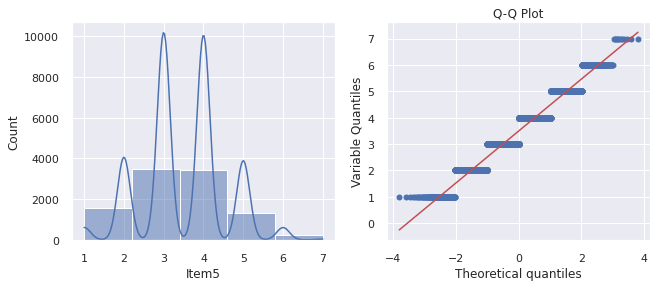

None


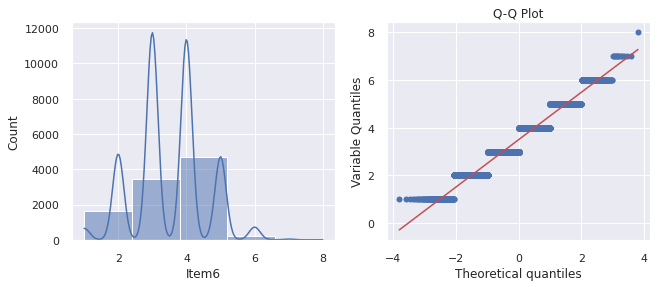

None


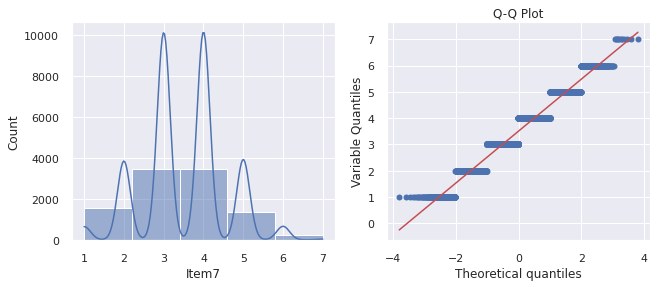

None


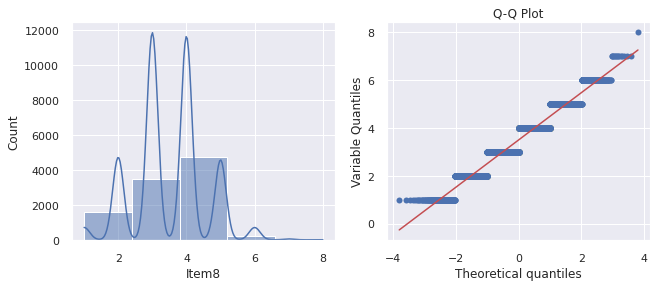

None


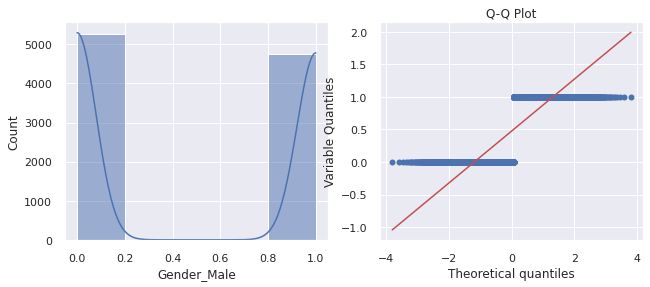

None


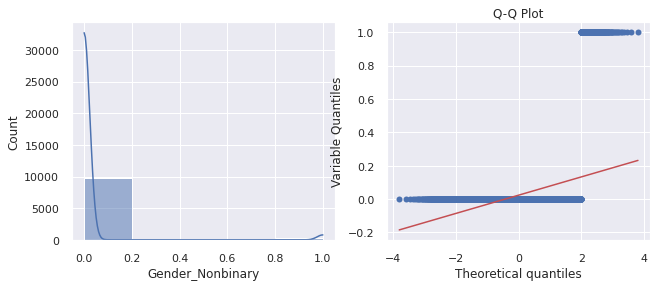

None


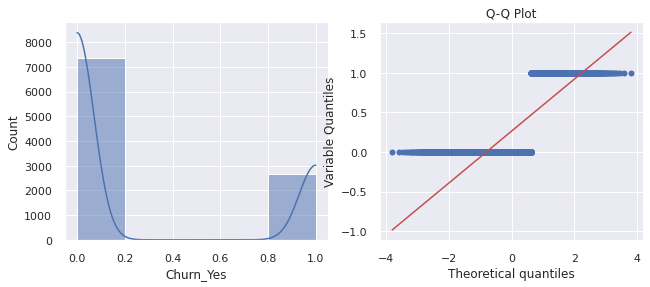

None


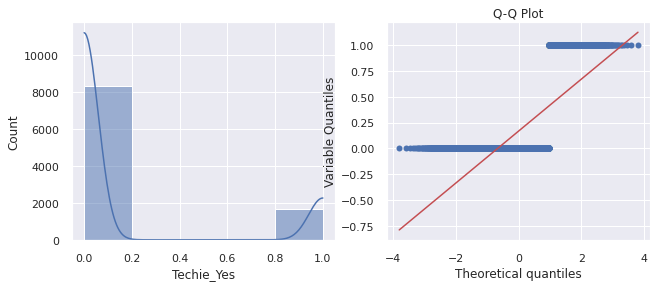

None


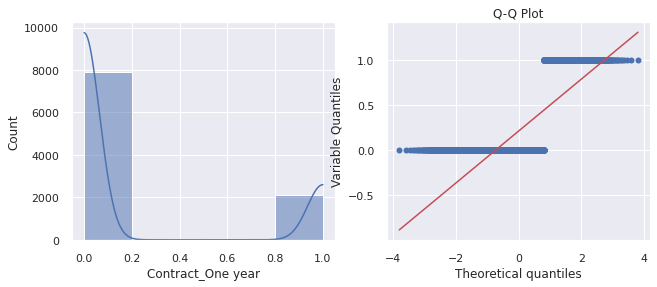

None


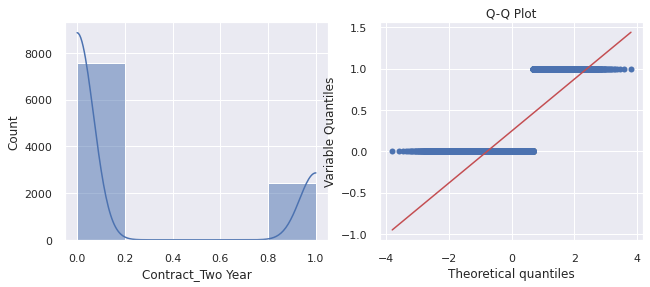

None


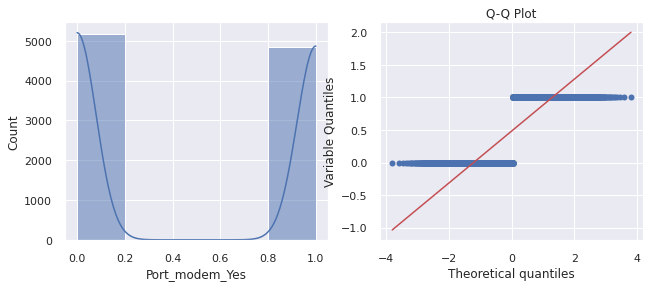

None


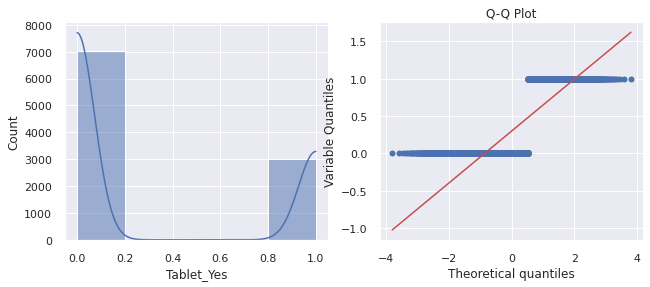

None


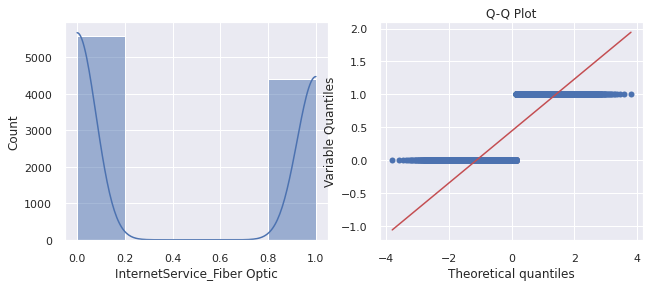

None


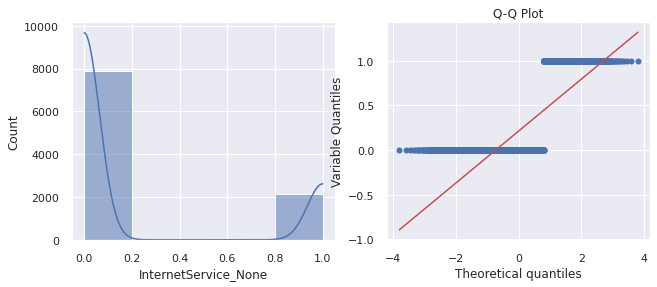

None


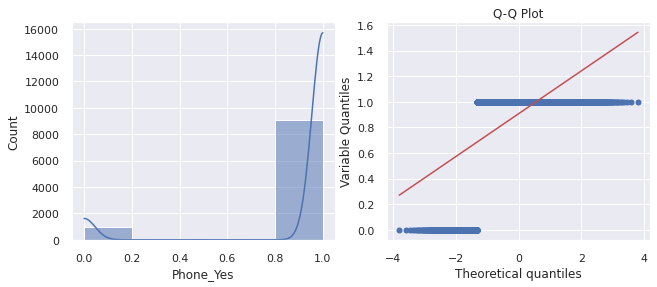

None


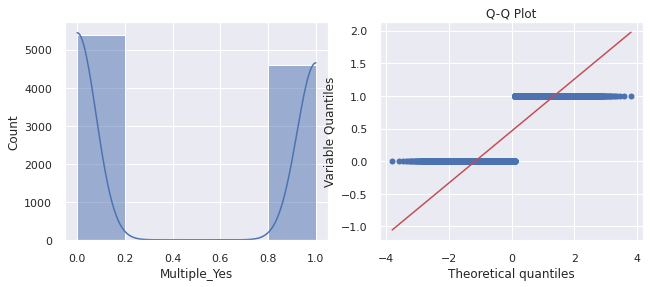

None


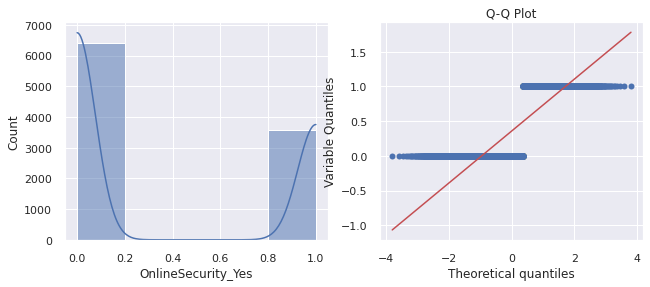

None


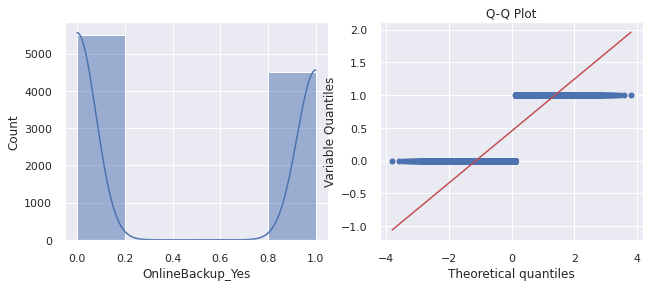

None


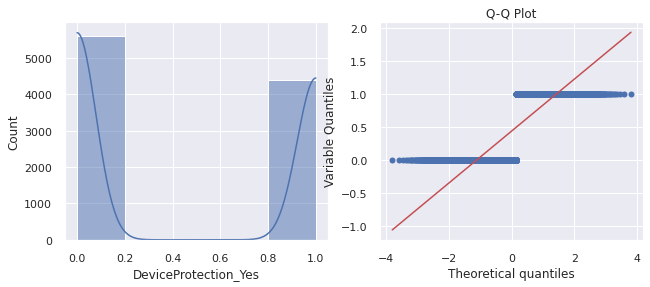

None


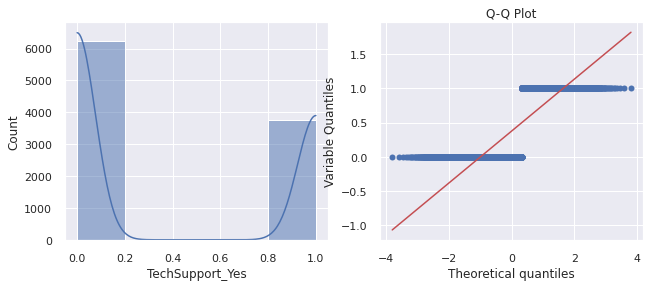

None


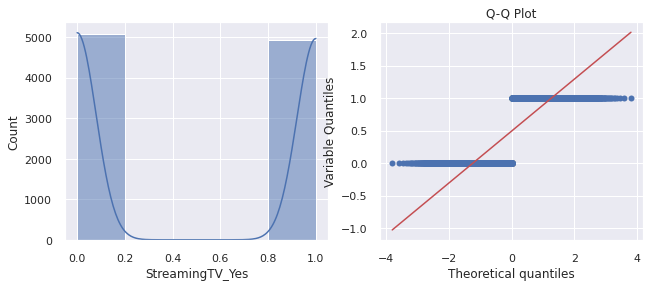

None


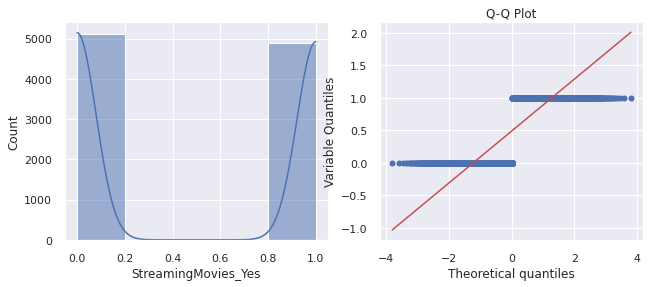

None


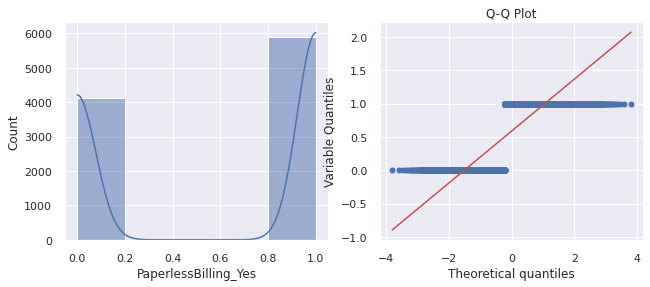

None


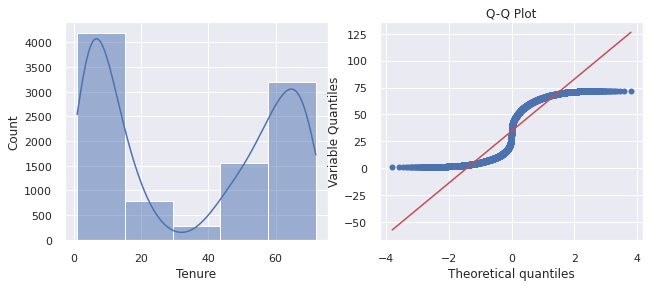

None


In [ ]:
#Univariate Data Distributions
for i in cleaned_churn.iloc[:,11:]:
  print(uni_plot(cleaned_churn,i))

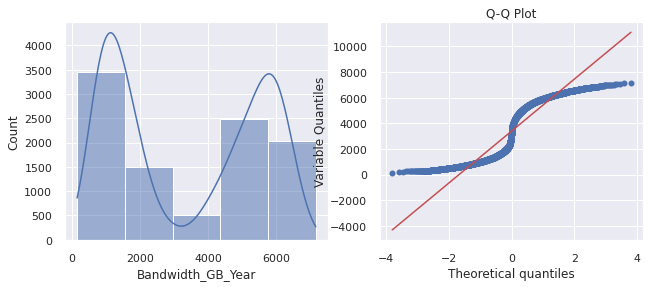

None


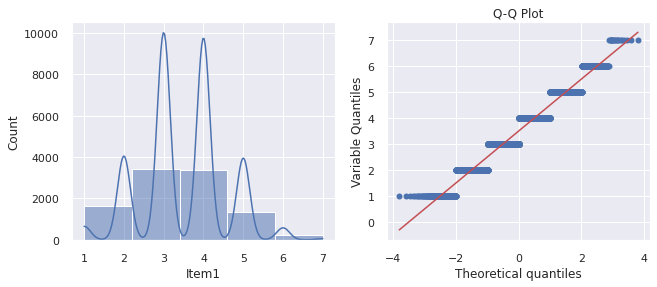

None


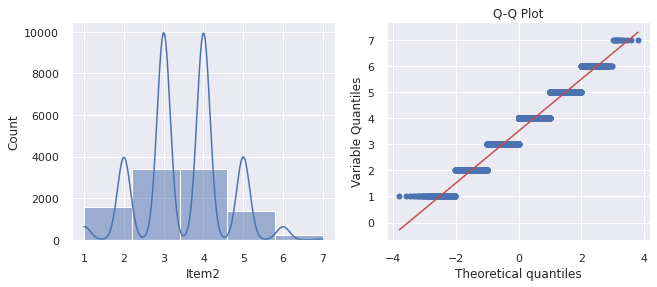

None


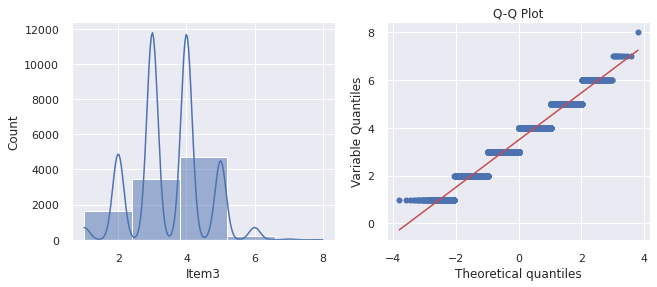

None


In [ ]:
for i in cleaned_churn[['Bandwidth_GB_Year', 'Item1','Item2', 'Item3']]:
  print(uni_plot(cleaned_churn,i))

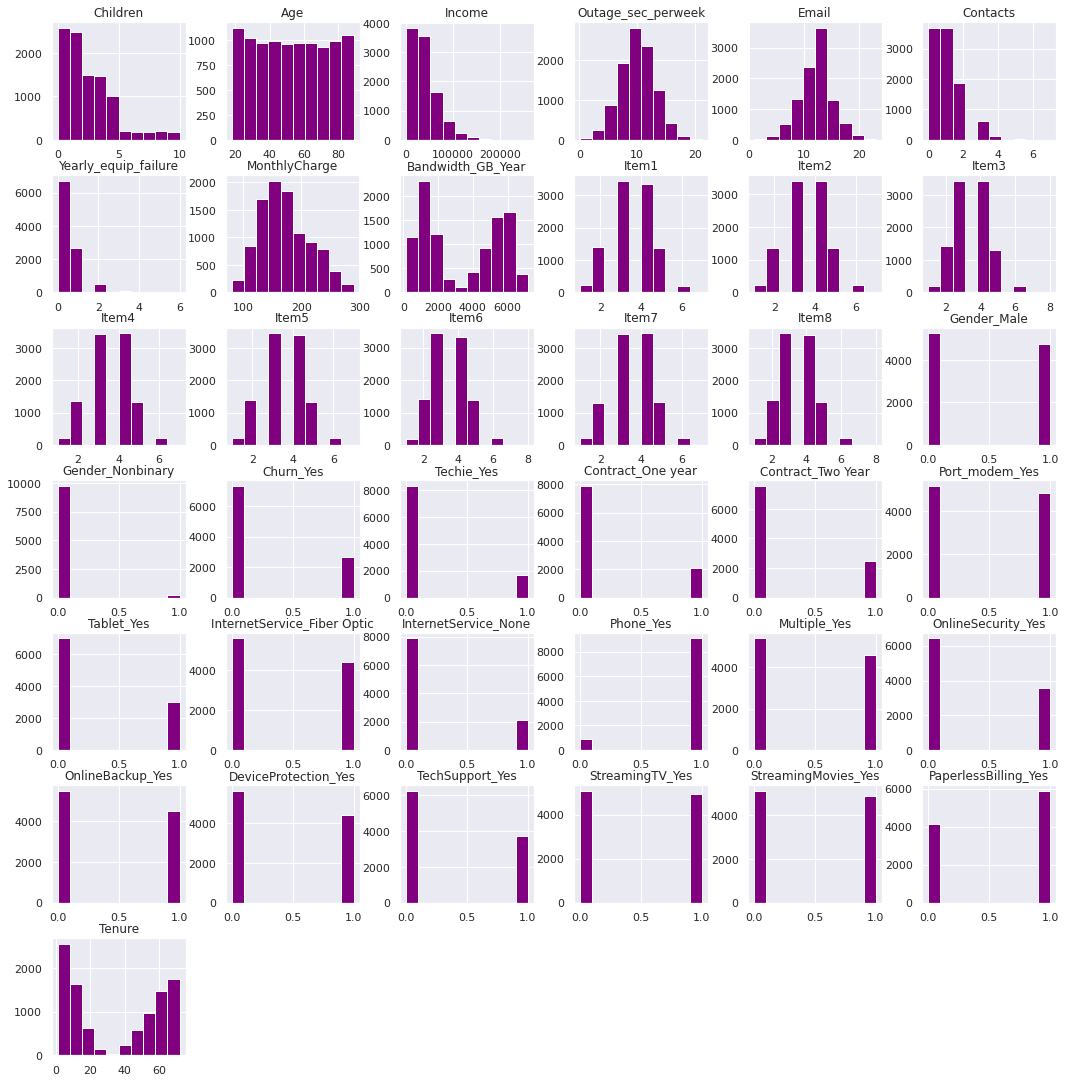

In [ ]:
# Univariate graphs
cleaned_churn.hist(figsize=(18,19), color = 'purple')
plt.show()

**Bivariate Analysis**

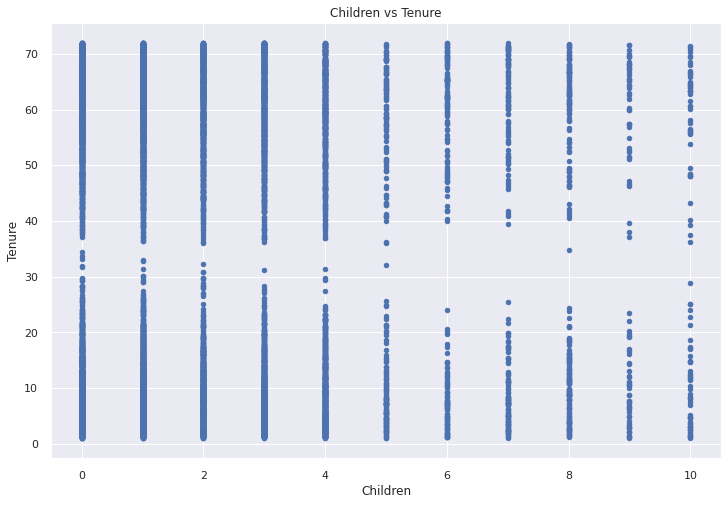

In [ ]:
#Bivariate Data Distribution
cleaned_churn.plot.scatter(x="Children", y="Tenure", figsize=(12,8))
plt.title('Children vs Tenure')
plt.show()

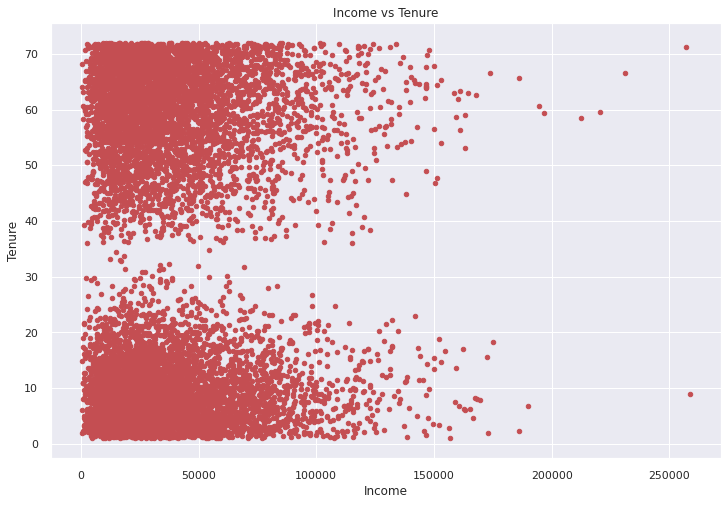

In [ ]:
cleaned_churn.plot.scatter('Income', 'Tenure', color='r',figsize=(12,8))
plt.title('Income vs Tenure')
plt.show()

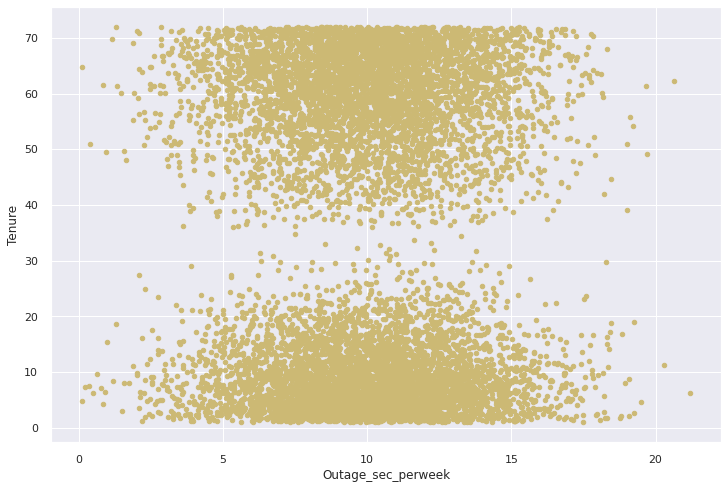

In [ ]:
cleaned_churn.plot.scatter('Outage_sec_perweek', 'Tenure', color='y',figsize=(12,8))
plt.show()

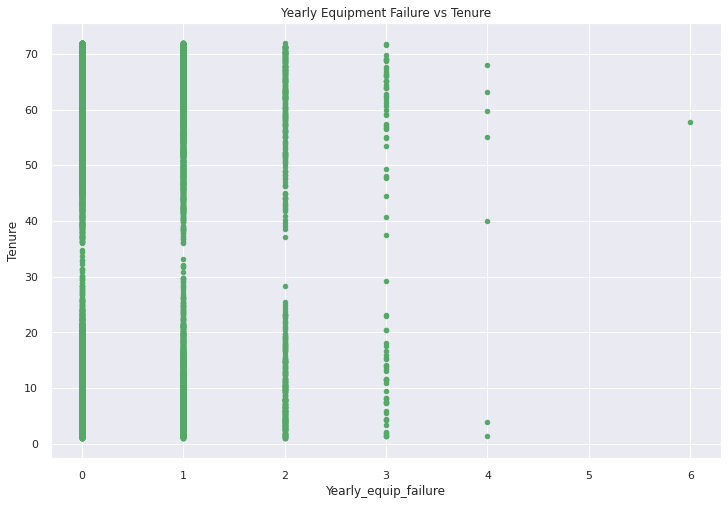

In [ ]:
cleaned_churn.plot.scatter('Yearly_equip_failure', 'Tenure', color='g',figsize=(12,8))
plt.title('Yearly Equipment Failure vs Tenure')
plt.show()

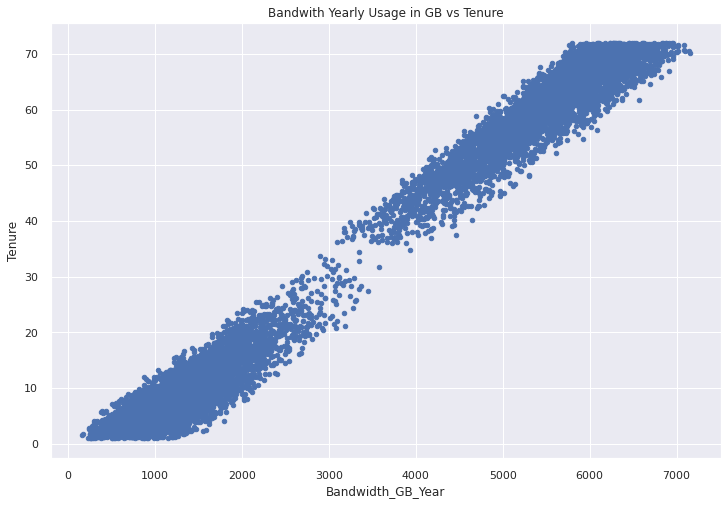

In [ ]:
cleaned_churn.plot.scatter('Bandwidth_GB_Year', 'Tenure', color='b',figsize=(12,8))
plt.title('Bandwith Yearly Usage in GB vs Tenure')
plt.show()

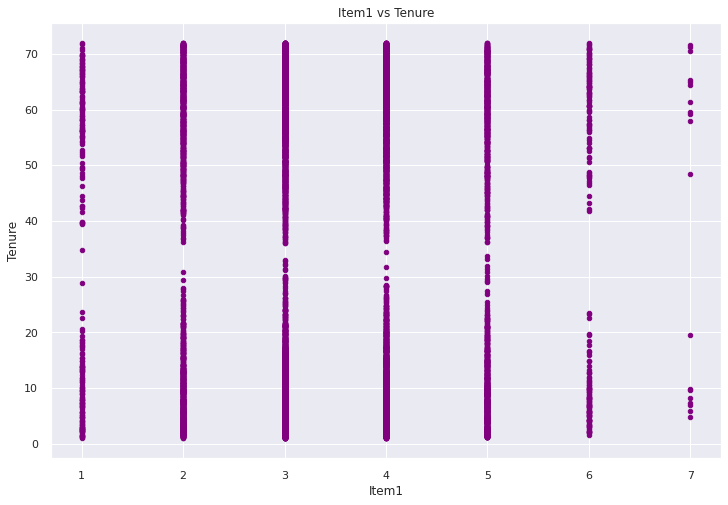

In [ ]:
cleaned_churn.plot.scatter('Item1', 'Tenure', color='purple',figsize=(12,8))
plt.title('Item1 vs Tenure')
plt.show()

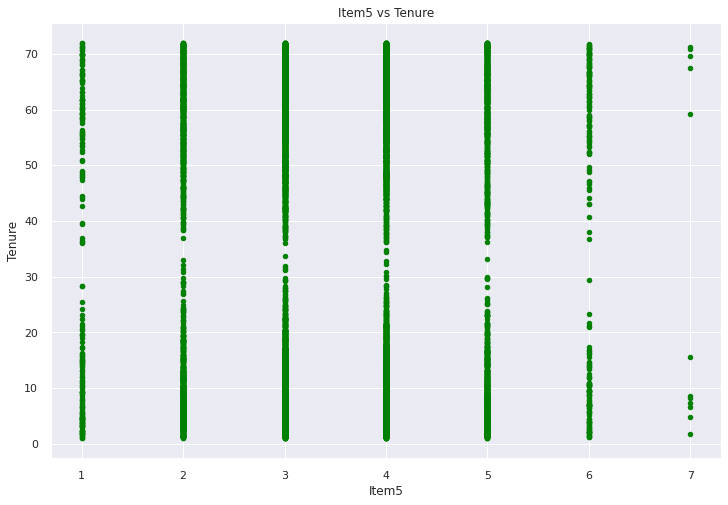

In [ ]:
cleaned_churn.plot.scatter('Item5', 'Tenure', color='green',figsize=(12,8))
plt.title('Item5 vs Tenure')
plt.show()

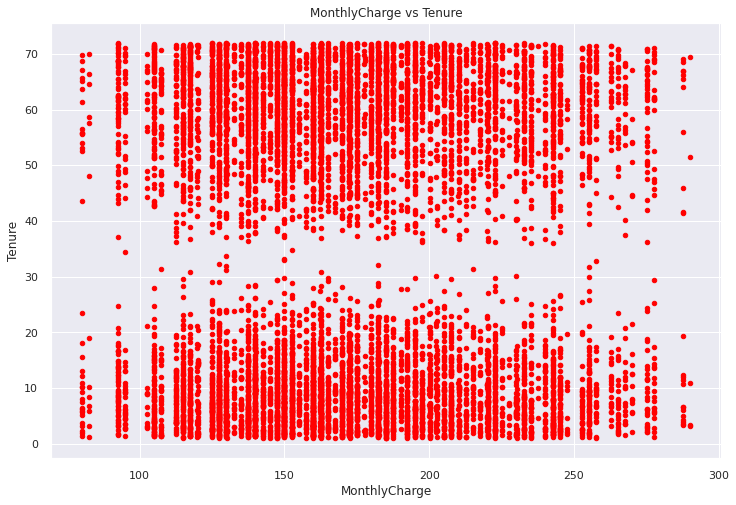

In [ ]:
cleaned_churn.plot.scatter('MonthlyCharge', 'Tenure', color='red',figsize=(12,8))
plt.title('MonthlyCharge vs Tenure')
plt.show()

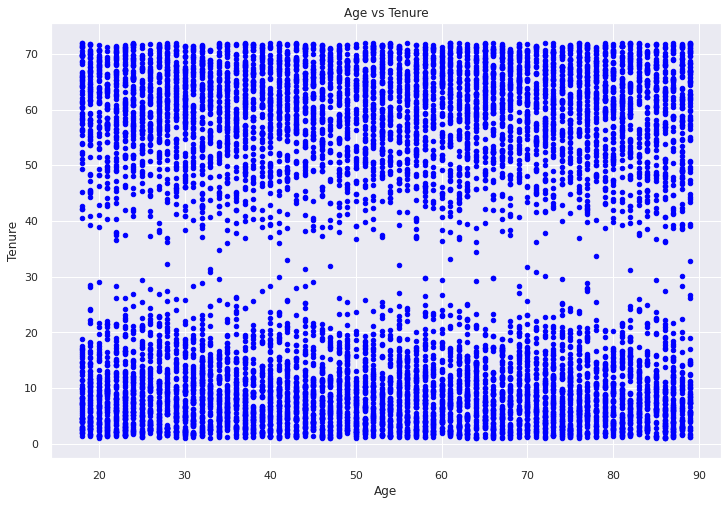

In [ ]:
cleaned_churn.plot.scatter('Age', 'Tenure', color='blue',figsize=(12,8))
plt.title('Age vs Tenure')
plt.show()

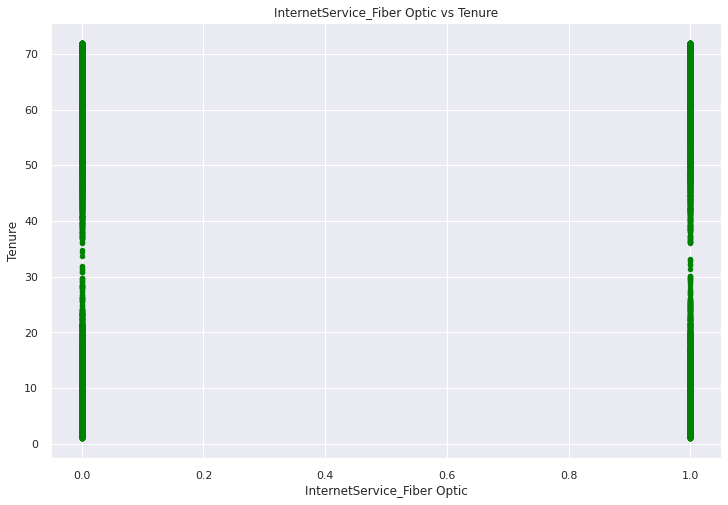

In [ ]:
cleaned_churn.plot.scatter('InternetService_Fiber Optic', 'Tenure', color='green',figsize=(12,8))
plt.title('InternetService_Fiber Optic vs Tenure')
plt.show()

## Validating No Multicollinearity Exists
Building a robust model that can be used for business decision-making purposes requires extensive mitigation techniques to tackle some underlying model's problems that don't show up during the model building processes but  only later when the model is in the production environment and therefore wreak havoc in providing bad business insights and possibly contribute to customer attrition. To avoid such disasters, two approaches will be employed to make the model a reliable one:
using a correlation heatmap and a variance inflation factor (VIF) method to counter multicollinearity problems.

- Variance inflation factor (VIF) is the determination of how much variance of a coefficient is increased due to multicollinearity (Ott et al., 2016) and VIF ranges from 1 indicating no multicollinearity to 5 or 10 indicating multicollinearity. The formula below shows how VIF is calculated for each predictor variable.

  **<center>VIF$_{k}$ = 1 / ( 1 - R$^{2}$$_{k}$ )</center>**


where **VIF$_{k}$** is VIF for variable *k*, and **R$^{2}$$_{k}$** is the coefficient of determination for the variable *k*.



By plotting the correlation matrix below, one of the assumptions about the linear regression is validating that no or little multicollinearity among the predictor variables.

There are could be  some predictor variables  that have some multicollinearity and therefore must be removed. By eliminating the variables with multicollinearity, we get one step closer to fulfilling one of the assumptions of linear regression.

The heatmap below shows the correlation among the predictor variables. Once the variables with high correlation are identified, another heatmap is used to show their high correlations in much detail to justify their removal.



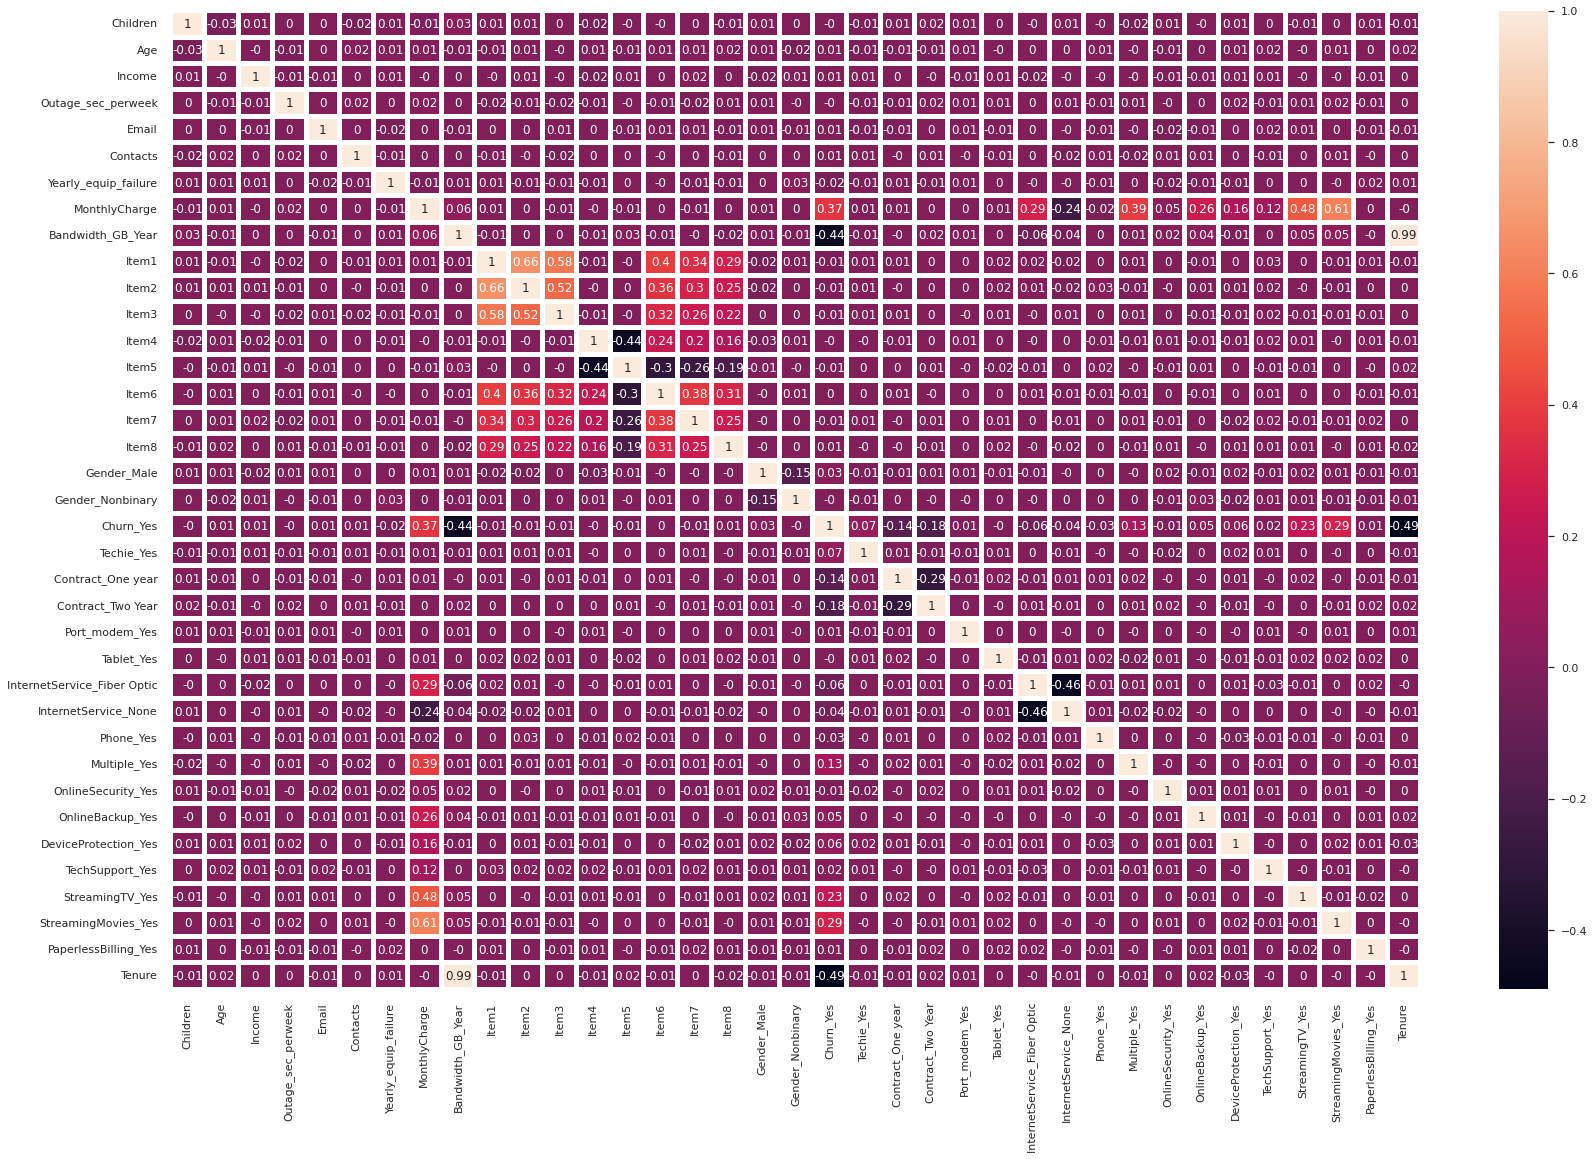

In [ ]:
fig,ax = plt.subplots(figsize=(28,18))
sns.heatmap(round(cleaned_churn.corr(),2),annot=True,lw=4, ax=ax)
plt.show()

In [ ]:
# **Source: https://etav.github.io/python/vif_factor_python.html**

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Function to check Variance Inflation Factor
def check_VIF(df):
  df = cleaned_churn.drop(columns=['Tenure'])
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif["features"] = df.columns
  return vif.round(1)

check_VIF(cleaned_churn)

,VIF Factor,features
0,1.9,Children
1,7.4,Age
2,3.0,Income
3,11.7,Outage_sec_perweek
4,15.6,Email
5,2.0,Contacts
6,1.4,Yearly_equip_failure
7,255.7,MonthlyCharge
8,5.0,Bandwidth_GB_Year
9,27.3,Item1


###Mutlticollinear Predictor Variables Visualized with Heatmap and Pairplots
The heatmap and pairplots below show that the variables with high correlations. Once their relationships are established, the removal step will implemented.

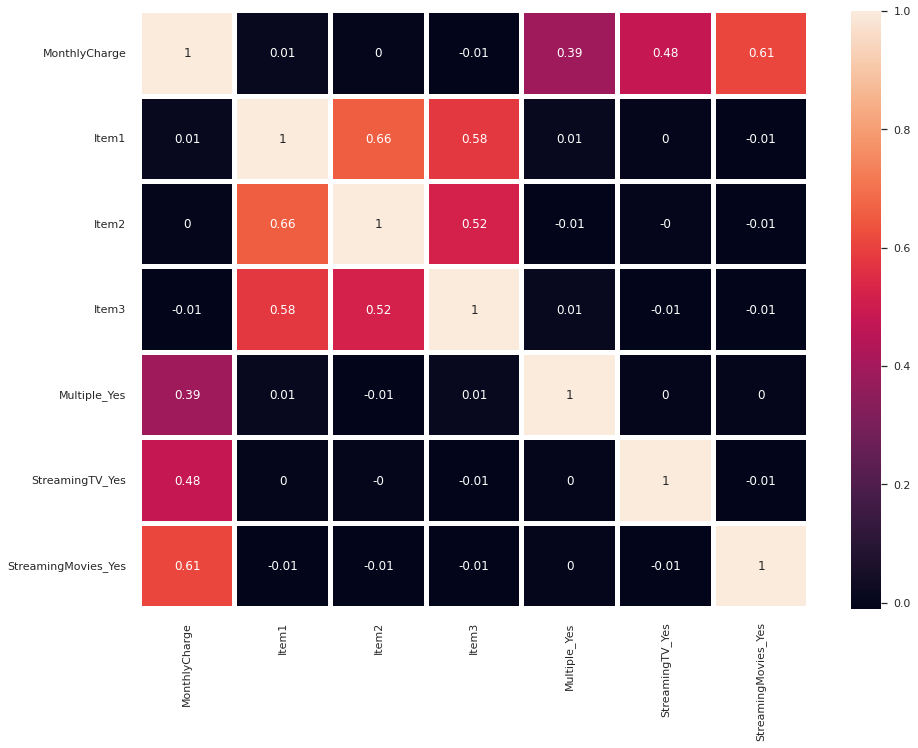

In [ ]:
fig,ax = plt.subplots(figsize=(15,11))
sns.heatmap(cleaned_churn[['MonthlyCharge','Item1','Item2','Item3','Multiple_Yes','StreamingTV_Yes','StreamingMovies_Yes']].corr().round(2),annot=True,lw=4, ax=ax)
plt.show()

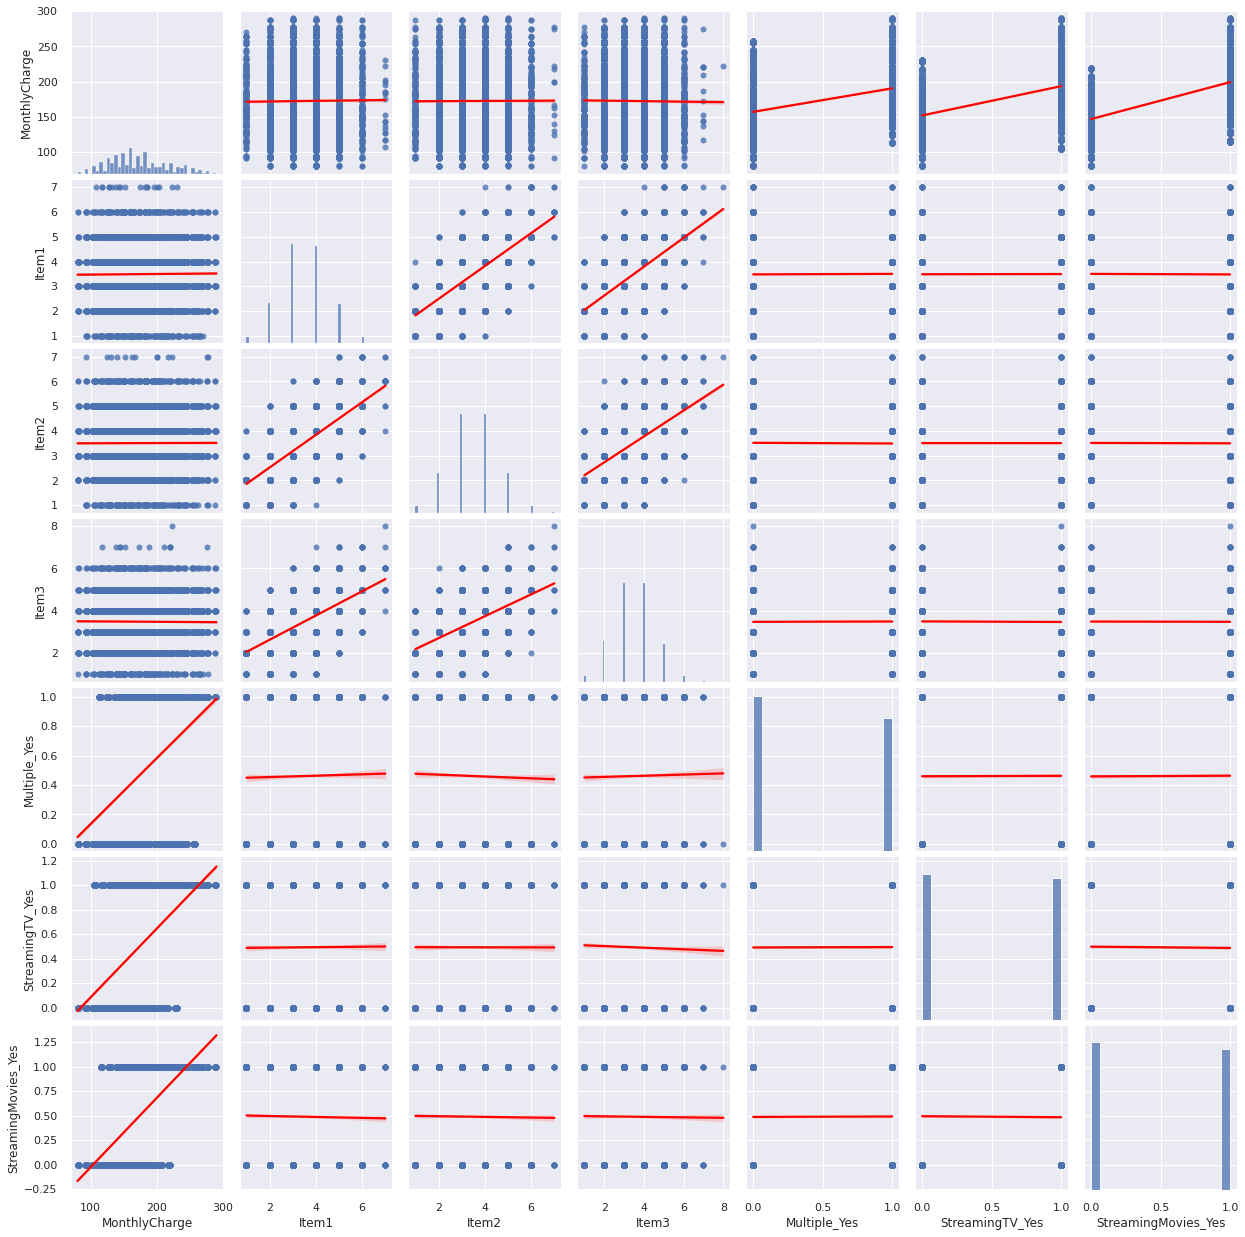

In [ ]:
# The plot to find high correlation among the selected variables.

sns.pairplot(cleaned_churn, vars=['MonthlyCharge','Item1','Item2','Item3','Multiple_Yes','StreamingTV_Yes','StreamingMovies_Yes'],kind="reg", plot_kws={'line_kws':{'color':'red'}})

plt.show()

#### Dropping Multicollinear Variables
The next step before building the models, the selected variables will be discarded from the dataset and save the refined data for the model building step.

In [ ]:
# Drop correlated predictor variables
cleaned_churn = cleaned_churn.drop(columns=['MonthlyCharge','Item1','Item2','Item3','Multiple_Yes','StreamingTV_Yes','StreamingMovies_Yes'])

In [ ]:
# Cbecking for multicollinearity and dropping more predictor variables
check_VIF(cleaned_churn)

,VIF Factor,features
0,1.9,Children
1,7.3,Age
2,3.0,Income
3,11.2,Outage_sec_perweek
4,14.8,Email
5,2.0,Contacts
6,1.4,Yearly_equip_failure
7,4.3,Bandwidth_GB_Year
8,13.3,Item4
9,11.3,Item5


In [ ]:
# Dropping more predictor variables after using VIF method
cleaned_churn = cleaned_churn.drop(columns=['Age','Outage_sec_perweek','Email','Item4', 'Item5',
       'Item6', 'Item7','Item8','Phone_Yes',])

### Drop Variables Using Domain-knowledge Method
Based on the customer interactions and from life experiences as a customer, some predictor variables have no influence on the target variable. Some examples are a customer's preferrence for a paperless billing, online backup or the port of their modem or a device protection plan that actually can incur extra charges. These variables relay no meaningful insights in correlation with a customer's tenure. Another reason to exclude more predictor variables is the technological trend meaning how recent is the technology the customer is using such as fiber internet  or tablet both of which are recent tech gadgets and have no effect on the customer's time with the company. Meanwhile,customer's knowledge of technology as in techie and customer's awareness about online threats also play no role in influencing the tenure. Finally, customer's gender should not be a factor whether a customer stays longer with the company as that introduces some biases and ethical dilemmas.

In [ ]:
# Drop the following predictor variables
cleaned_churn = cleaned_churn.drop(columns=['Gender_Male','Gender_Nonbinary','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes', 'InternetService_Fiber Optic',
       'Techie_Yes', 'Tablet_Yes','Port_modem_Yes','PaperlessBilling_Yes',])

**C5: PREPARED DATA SET:**

In [ ]:
data_cleaned = cleaned_churn.to_csv()

In [ ]:
# Save the dataset to this location below
from pathlib import Path
filepath = Path('/content/drive/MyDrive/Colab Notebooks/Churn_data_cleaned.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
cleaned_churn.to_csv(filepath)


## **Part IV: Model Comparison and Analysis**

**D1: INITIAL MODEL:**

D. Compare an initial and a reduced multiple regression model by doing the following:

The initial model contains all the variables except the ones that don't make any sense to include them such as zipcodes and others. Also some variables are further reduced using correlation matrix, VIF and domain-knowledge methods.

**Tenure = -3.3 - 3.9Children - 1.009701e-07Income + 0.046Contacts - 0.067Yearly_equip_failure + 0.0117Bandwidth_GB_Year - 3.67Churn_Yes -
0.97Contract_One.year - 0.084Contract_Two.Year + 1.99InternetService_None - 0.0125TechSupport_Yes**

In [ ]:
# Building the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = cleaned_churn.drop(columns='Tenure')
Y = cleaned_churn['Tenure']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

# Setup the model
model = LinearRegression().fit(X_train,y_train)
print("The number of rows and columns for training data is:",X_train.shape)
print("The number of rows and columns for test data is:",X_test.shape)
print("The number of rows for training data is:",y_train.shape)
print("The number of rows for test data is:",y_test.shape)

# print the intercept
print("The Model's Intercept is :",model.intercept_)


The number of rows and columns for training data is: (6000, 10)
The number of rows and columns for test data is: (4000, 10)
The number of rows for training data is: (6000,)
The number of rows for test data is: (4000,)
The Model's Intercept is : -3.3090794446251763


In [ ]:
# Checking VIF if variables can be removed
check_VIF(cleaned_churn)

,VIF Factor,features
0,1.8,Children
1,2.5,Income
2,1.8,Contacts
3,1.4,Yearly_equip_failure
4,2.7,Bandwidth_GB_Year
5,1.4,Churn_Yes
6,1.3,Contract_One year
7,1.4,Contract_Two Year
8,1.2,InternetService_None
9,1.5,TechSupport_Yes


In [ ]:
# The coefficients of the predictor variables shown
coeff_param = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_param

,Coefficient
Children,-3.914697e-01
Income,-1.009701e-07
Contacts,4.610074e-02
Yearly_equip_failure,-6.705253e-02
Bandwidth_GB_Year,1.167488e-02
Churn_Yes,-3.675366e+00
Contract_One year,-9.570987e-01
Contract_Two Year,-8.447200e-01
InternetService_None,1.985148e+00
TechSupport_Yes,-1.250797e-02


## Predicting the Outcome

In [ ]:
# Predicting the outcome
predictions = model.predict(X_test)
predictions

array([62.512901  , 65.52186488, 58.63479102, ..., 62.28573888,
        1.49872924, 54.64517044])

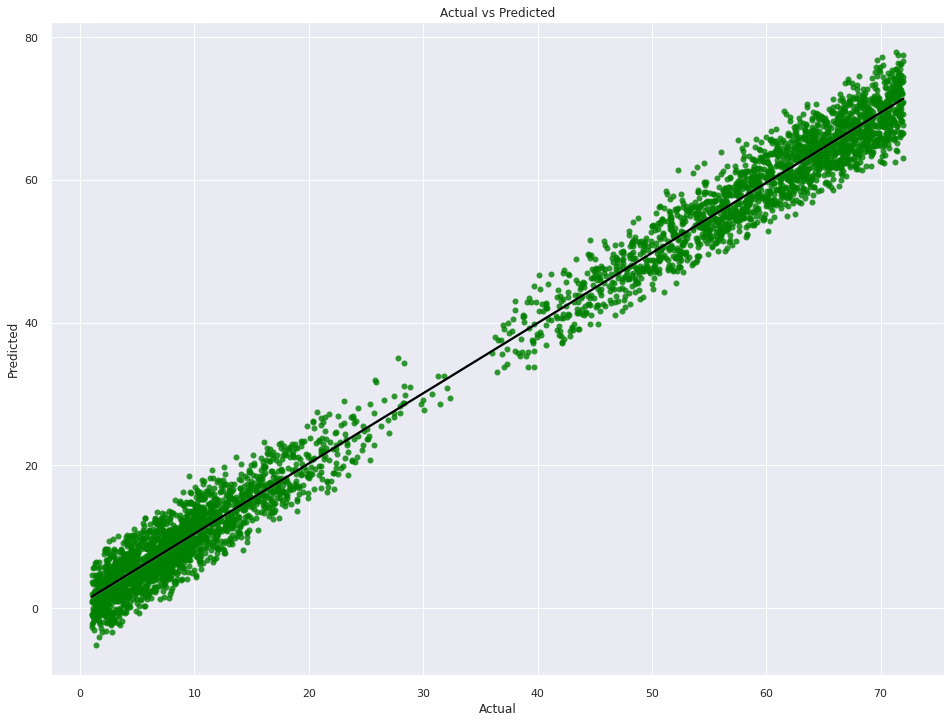

In [ ]:
# Displaying the actual vs predicted values graph
fig,ax = plt.subplots(figsize=(16,12))
sns.regplot(y_test,predictions, ax=ax, color='blue',scatter_kws={"color": "green"},line_kws={"color": "black"})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
# Displaying the table for actual and predicted values
pred_y_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':predictions, 'Difference': y_test - predictions})
pred_y_df.head()

,Actual Values,Predicted Values,Difference
6676,68.19429,62.512901,5.681389
6421,67.86743,65.521865,2.345565
9834,57.56332,58.634791,-1.071471
8492,71.99418,70.912346,1.081834
9982,68.52825,68.022013,0.506237


In [ ]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 5.041e+04
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:49:52   Log-Likelihood:                -14847.
No. Observations:                6000   AIC:                         2.972e+04
Df Residuals:                    5989   BIC:                         2.979e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.3091 

In [ ]:
# Calculating the residuals
residuals = y_test - predictions
mean_residuals, median_residuals = np.mean(residuals), np.median(residuals)
print("Mean of Residuals :{}".format(mean_residuals.round(2)))
print("Median of Residuals :{}".format(median_residuals.round(2)))

Mean of Residuals :-0.01
Median of Residuals :0.06


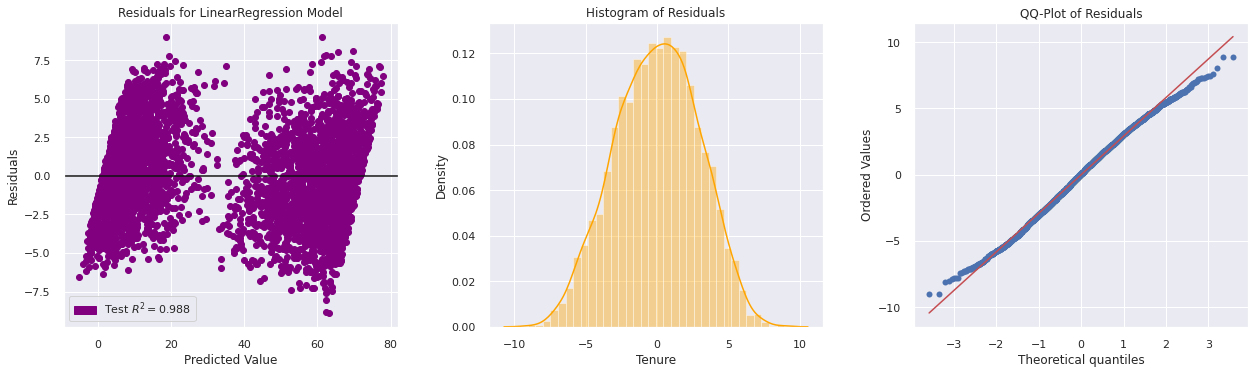

In [ ]:
# Function to display residuals plots
def residual_plots(x):
  plt.subplots(figsize=(18,6))
  # Residual plots
  from yellowbrick.regressor import ResidualsPlot
  ax = plt.subplot(1,3,1)
  visualize = ResidualsPlot(model, hist=False, train_color='r',test_color='purple', train_alpha=1, test_alpha=1)
  visualize.score(X_test, y_test)

  # Histogram of Residuals
  plt.subplot(1,3,2)
  # fig,ax = plt.subplots(figsize=(12,12))
  sns.distplot(residuals, color='orange')
  plt.title('Histogram of Residuals')

  # QQ Plot
  plt.subplot(1,3,3)
  stats.probplot(residuals, dist='norm', plot=plt)
  plt.title('QQ-Plot of Residuals')

  plt.tight_layout(pad=3)
  visualize.show()
  return plt.show()

# Call the function to display residual plots
residual_plots(residuals)

The residuals are close to zero and randomly distributed and therefore the assumption of linear regression is met. The histogram shows the bell curve distribution of the residuals.The Q-Q plot displays a normal distribution of residuals as well with a few points outside of the normal ranges.

**D2: JUSTIFICATION OF MODEL REDUCTION:**

Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

In linear regression, there are several methods to reduce the number of predictor variables in the dataset. Once such an approach applied to our dataset is the use of p-value. The p-value method reduces the number of variables to their most statistically significant features so that the model can improve the prediction accuracy and provide better interpretation by using a smaller subset of variables that have strongest effects(Hastie et al., 2017).

By comparing the initial and reduced models, we can discover some relationships among the predictors that do not add values to the model's ability to accurately predict the outcome.

**D3: REDUCED MULTIPLE REGRESSION MODEL:**

Looking at the initial model results, 15 variables have p-values less than 0.05 and therefore they will be used to construct our reduced multiple linear regression model equation.

In [ ]:
# Selecting statistically significant variables only
selected_vars = cleaned_churn[['Children', 'Bandwidth_GB_Year', 'Churn_Yes','Contract_One year', 'Contract_Two Year',
                                'Tenure']]
selected_vars

,Children,Bandwidth_GB_Year,Churn_Yes,Contract_One year,Contract_Two Year,Tenure
0,0,904.536110,0,1,0,6.795513
1,1,800.982766,1,0,0,1.156681
2,4,2054.706961,0,0,1,15.754144
3,1,2164.579412,0,0,1,17.087227
4,0,271.493436,1,0,0,1.670972
...,...,...,...,...,...,...
9995,3,6511.252601,0,0,0,68.197130
9996,4,5695.951810,0,0,1,61.040370
9997,1,4159.305799,0,0,0,47.416890
9998,1,6468.456752,0,0,1,71.095600


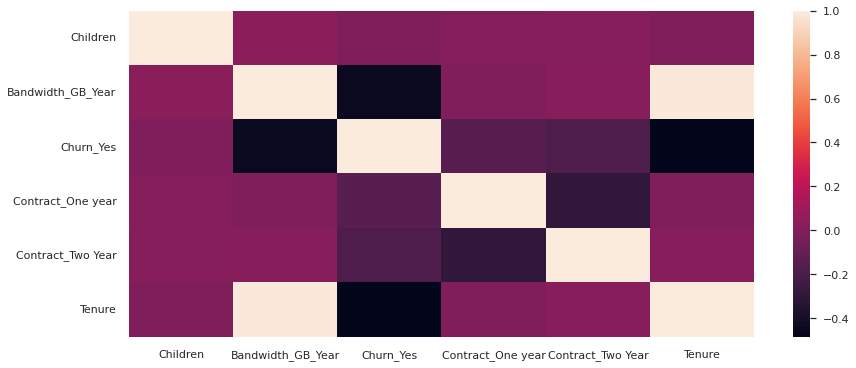

In [ ]:
# Displaying the correlations among the variables
fig= plt.subplots(figsize=(14,6))
sns.heatmap(selected_vars.corr())
plt.show()

In [ ]:
# Building the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = selected_vars.drop(columns='Tenure')
Y = selected_vars['Tenure']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
# Check the rows and columns
print("Rows and Columns of Training Data:", X_train.shape)
print("Rows and Columns of Test Data:",X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Model setup
model = LinearRegression()
model.fit(X_train,y_train)

# print the intercept
print("The model's intercept is:", model.intercept_)

Rows and Columns of Training Data: (6000, 5)
Rows and Columns of Test Data: (4000, 5)
(6000,)
(4000,)
The model's intercept is: -2.713869668022028


In [ ]:
# Checking VIF once again
check_VIF(cleaned_churn)

,VIF Factor,features
0,1.8,Children
1,2.5,Income
2,1.8,Contacts
3,1.4,Yearly_equip_failure
4,2.7,Bandwidth_GB_Year
5,1.4,Churn_Yes
6,1.3,Contract_One year
7,1.4,Contract_Two Year
8,1.2,InternetService_None
9,1.5,TechSupport_Yes


In [ ]:
# Coeffiecient of the predictor variables shown
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Children,-0.384144
Bandwidth_GB_Year,0.011641
Churn_Yes,-3.840503
Contract_One year,-0.999285
Contract_Two Year,-0.894257


In [ ]:
# Predicting the outcome
predictions = model.predict(X_test)
predictions

array([62.9119935 , 63.90064241, 59.01623074, ..., 62.78398712,
        1.8739571 , 55.05683258])

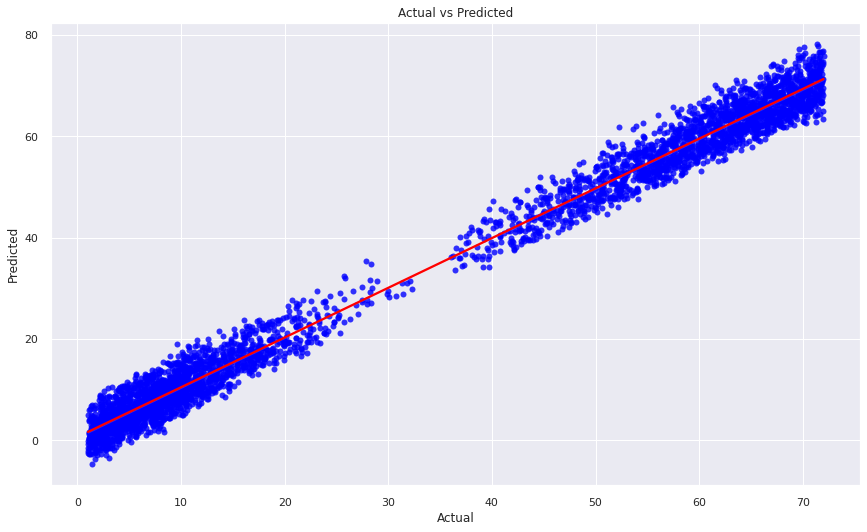

In [ ]:
# Displaying the acutal  vs predicted values regression graph
fig, ax = plt.subplots()
fig.set_size_inches(14.5,8.5)
sns.regplot(y_test,predictions, ax=ax,scatter_kws={"color": "blue"},line_kws={"color": "red"})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
# Displaying the table for actual and predicted values
pred_y_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':predictions, 'Difference': y_test - predictions})
pred_y_df.head()

,Actual Values,Predicted Values,Difference
6676,68.19429,62.911994,5.282296
6421,67.86743,63.900642,3.966788
9834,57.56332,59.016231,-1.452911
8492,71.99418,71.310988,0.683192
9982,68.52825,66.387748,2.140502


In [ ]:
# Ordinary least square regression statistical summary results
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 9.342e+04
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:56:30   Log-Likelihood:                -15076.
No. Observations:                6000   AIC:                         3.016e+04
Df Residuals:                    5994   BIC:                         3.020e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.7139      0.11

In [ ]:
# Calculating the residuals
residuals = y_test - predictions
mean_residuals, median_residuals = np.mean(residuals), np.median(residuals)
print("Mean of Residuals :{}".format(mean_residuals.round(2)))
print("Median of Residuals :{}".format(median_residuals.round(2)))

Mean of Residuals :-0.0
Median of Residuals :0.19


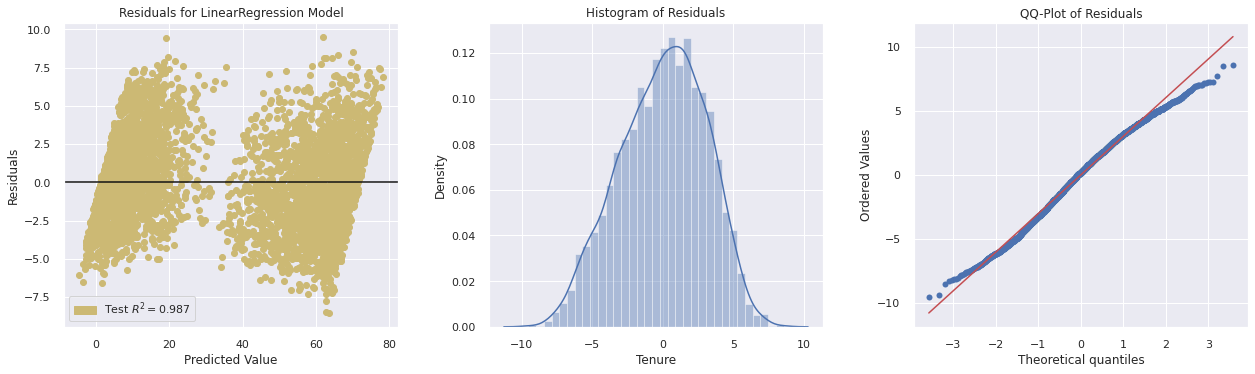

In [ ]:
# Function to display residuals plots
def residual_plots(x):
  plt.subplots(figsize=(18,6))
  # Residual plots
  from yellowbrick.regressor import ResidualsPlot
  ax = plt.subplot(1,3,1)
  visualize = ResidualsPlot(model, hist=False, train_color='r',test_color='y', train_alpha=1, test_alpha=1)
  visualize.score(X_test, y_test)

  # Histogram of Residuals
  plt.subplot(1,3,2)
  # fig,ax = plt.subplots(figsize=(12,12))
  sns.distplot(residuals)
  plt.title('Histogram of Residuals')

  # QQ Plot
  plt.subplot(1,3,3)
  stats.probplot(residuals, dist='norm', plot=plt)
  plt.title('QQ-Plot of Residuals')

  plt.tight_layout(pad=3)
  visualize.show()
  return plt.show()

# Call the function to display residual plots
residual_plots(residuals)

The residuals are close to zero and randomly distributed and therefore the assumption of linear regression is met. The histogram shows the bell curve distribution of the residuals.The Q-Q plot displays a normal distribution of residuals as well with a few points outside of the normal ranges.


E. Analyze the data set using your reduced multiple regression model by doing the following:

**E1: MODEL COMPARISON:**


The initial multiple regression model contains 10 variables compared to the reduced regression with 5 variables in which the p-value and VIF techniques were used to remove the correlated predictor variables .

 After running both the initial and the reduced models hand in hand, an evaluation metric called R-squared is used. The R-squared signifies the proportion of the variance in the target variable that can be explained by the predictor variables in the model (Bobbitt, 2022). Both the initial and reduced models indicate the higher level of R-squared that’s close to 1 (0.988 and 0.987 respectively) since R-squared ranges from 0 to 1. The higher the R-squared value, the better the model in explaining the variance in the target variable. In other words, the selected variables are good at explaining variance in the target variable, tenure.

On the other hand, residual plot indicates the linear regression assumption is met because the points are distributed normally as shown by the bell-curved graphs above for both the initial and reduced models. Also the residual Q-Q plots indicate that data are normally distributed as the mean and median are approximately equal to 0. From the residual plot point of view, the linear model is the right approach for building the predictive modeling for the data used as the error term is at the minimal preferred distance from the regression line.

**E2: OUTPUT AND CALCULATIONS:**

Check parts D1 and D2 for output and calculations

**E3: CODE:**

Check parts D1 and D2.

## **Part V: Data Summary and Implications**

F. Summarize your findings and assumptions by doing the following:

**F1: RESULTS:**

Discuss the results of your data analysis, including the following elements:

### Regression Equation for the Reduced Model

Here's the equation representing the reduced regression model:

 **<center>Tenure = -2.71 - 0.384Children + 0.0116Bandwidth_GB_Year - 3.84Churn_Yes - 0.9993Contract_One_Year - 0.8943Contract_Two_Year</center>**                                           

### Interpretation of Coefficients of the Statistically Significant Variables of the Model

There are 5 variables that are statistically significant: Children and Bandwith_GB_Year, Churn_Yes, Contract_One_year, and Contract_Two_year. With the exception of Bandwidth_GB_Year variable's coefficient, all the other variables' coefficients are negatively contributing to the target variable, tenure. This inverse relationship indicates that as tenure increases, the number of children in the househould, types of contract, and a customer churning likelihood all decrease by a single unit individually when other vaiables are held constant.

### The Statistical and Practical Significance of the Model
Since the p-values of the significant variables are below the threshold of 0.05, they are statistically significant because there exists a relationship among the predictor and target variables and therefore it is not by chance they are related.

Because the model's R-squared is 0.9847, the model is practically signicant as the variables in the dataset tend to relate to customers' time with the company. The bandwidth of GB usage tends to increase over time as the customers stay longer with company. There's a linear relationship with tenure when it comes to bandwidth of GB usage. It makes sense that the longer a customer stays with the company, the more data is used by the customer and therefore the linear relationship is practically significant.

### Limitations of the Data Analysis
Even though the model's accuracy is high when predicting the outcome, tenure, it's hard to ascertain whether some variables can be included or excluded as they lack practical application when predicting the target variable (the case of overfitting). For example, some categorical variables create overfitting problems in the application of multiple regression model as they require steps to first convert them into numerical variables which reduces the degree of freedom. The number of degree of freedom signifies the number of predictor variables of information present to predict the target variable and the less the number of predictor variables the less information to build a model that can generalize to other datasets and therefore the result is overfitting problems that limit the model's accuracy on other datasets(Nisbet et al., 2018).

**F2: RECOMMENDATIONS:**


Among all the predictor variables, bandwith of data usage has the highest form of linearity with the tenure variable and therefore the company should continuously provide better data plans for all its customers to prevent them from leaving the company prematurely. The telecom company should also factor in the customers' likelihood of churning, the contract types the customers prefer, and finally the number of children in the customers' households. By incorporating all these variables, the company can be successful in the long run and can even possibly gain new customers.

## **Part VI: Demonstration**

**G: PANOPTO DEMONSTRATION:**

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=2c22741b-88ed-490d-a2aa-aee400217161

**H: SOURCES OF THIRD-PARTY CODE:**

Tavares, E. (n.d.). Variance inflation factor (VIF) explained. Ernest Tavares III Full RSS. Retrieved July 29, 2022, from https://etav.github.io/python/vif_factor_python.html

**I: SOURCES:**

Bobbitt, Z. (2022, June 20). What is explained variance? (definition &amp; example). Statology. Retrieved July 16, 2022, from https://www.statology.org/explained-variance/

Frankenfield, J. (2021, September 21). Reading into Predictive modeling. Investopedia. Retrieved July 2, 2022, from https://www.investopedia.com/terms/p/predictive-modeling.asp

Hastie, T. J., Friedman, J. H., & Tibshirani, R. (2017). Linear Methods for Regression. In The elements of Statistical Learning: Data Mining, Inference, and prediction (pp. 57–57). essay, Springer.

Lantz, B. (2019). Machine learning with r: Expert techniques for Predictive modeling. Packt Publishing.

Nisbet, R., Yale, K., Elder, J. F., Miner, G., &amp; Peterson, A. (2018). Handbook of Statistical Analysis and Data Mining Applications. Elsevier Academic Press.

Ott, L., & Longnecker, M. (2016). Linear Regression and Correlation . In An introduction to statistical methods & data analysis (pp. 555–556). essay, Cengage Learning.

Pardoe, I. (2021). Applied Regression Modeling. Wiley.

Rane, Z. (2021, August 19). 10 compelling reasons to learn Python for data science. Medium. Retrieved July 2, 2022, from https://towardsdatascience.com/10-compelling-reasons-to-learn-python-for-data-science-fa31160321cb

Why should you learn Python for data science? 7 Reasons Why You Should Master Python For Data Science. (2022, May 31). Retrieved July 2, 2022, from https://www.andlearning.org/why-should-you-learn-python-for-data-science/


In [ ]:
l = [ i for i in range(6)]